In [59]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

bottle = pd.read_csv('bottle.csv', usecols = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID',\
                                             'Depthm', 'T_degC', 'Salnty', 'O2ml_L',\
                                             'STheta'])

In [2]:
bottle = pd.read_csv('bottle_analysis.csv')

In [3]:
bottle.head(50)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,year,month
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,1849,3
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,1849,3
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,1849,3
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,1849,3
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,1849,3
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,NaN,25.651,1849,3
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,NaN,25.658,1849,3
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,NaN,25.682,1849,3
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,NaN,25.710,1849,3
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,NaN,25.801,1849,3


In [4]:
bottle.tail()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,year,month
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,1916,11
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,1916,11
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,1916,11
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,1916,11
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.3880,5.774,24.15297,1916,11


Description about some cols:

DepthID: [Century]-[YY][MM][ShipCode]-[CastType][Julian Day]-[CastTime]-[Line][Sta][Depth][Bottle]-[Rec_Ind]

O2ml_L: milliliters of dissolved oxygen per Liter

SThea: potential density of water

In [5]:
bottle['Depthm'].isnull().values.any()
# all numeric value no NaN

False

In [6]:
bottle['T_degC'].isnull().values.any()
# it has NaN

True

In [7]:
bottle['T_degC'].isnull().sum()

10963

In [8]:
bottle['T_degC'].notnull().sum()

853900

In [9]:
10963/853900

0.01283873989928563

In [10]:
bottle['Salnty'].isnull().values.any()

True

In [11]:
bottle['Salnty'].notnull().sum()

817509

In [12]:
bottle['Salnty'].isnull().sum()

47354

In [13]:
47354/817509

0.05792474455938711

In [14]:
bottle['O2ml_L'].isnull().values.any()

True

In [15]:
bottle['O2ml_L'].isnull().sum()

168662

In [16]:
bottle['O2ml_L'].notnull().sum()

696201

In [17]:
168662/696201

0.24226049660945617

In [18]:
bottle['STheta'].isnull().values.any()

True

In [19]:
bottle['STheta'].isnull().sum()

52689

In [20]:
bottle['STheta'].notnull().sum()

812174

In [21]:
52689/812174

0.06487402945674203

# My question: Can we predict the milliliters of dissolved oxygen using regression?

In [22]:
#Pre process dataset
#Step 1: fill missing values

In [23]:
# caculate the mean and then save into a dict
def caculate_mean(df, v_dict, cast, col, mean):
    if cast not in v_dict.keys():
        # when all value in that cast is missing
        if df[ df['Cst_Cnt'] == cast ][col].isnull().values.all().all():
            v_dict[cast] = mean
        else:
            v_dict[cast] = df[ df['Cst_Cnt'] == cast ][col].mean()
        
    return v_dict

In [24]:
# fill NaN with column by wills
def fill_nan(df, col, nan_list):
    v_dict = {}
    mean = df[col].mean()
    for i in nan_list:
        x = df.iloc[i]['Cst_Cnt']
        if x not in v_dict:
            v_dict = caculate_mean(df, v_dict, x, col, mean)
        df.loc[i,col] = v_dict[x]

In [25]:
# make a list of iloc number of NaN
def check_nan(df, col, limit):
    nan_list = []
    count = 0
    for i, row in df.iterrows():
        if np.isnan(row[col]) == True :
            count += 1
            nan_list.append(i)
            if count == limit:
                break
    return nan_list

In [26]:
# nan_list = check_nan(bottle, 'T_degC', bottle['T_degC'].isnull().sum())

In [27]:
# fill_nan(bottle,'T_degC',nan_list)

In [28]:
# bottle.to_csv('bottle_analysis.csv', index = False)

In [29]:
def decode_depth_id_y(row):
    string = row['Depth_ID']
    string = string[:7]
    parse = string.split('-')
    year = (int(parse[0]) - 1) * 100 + int(parse[1][:2])
    # month = int(parse[1][2:])
    return year

In [30]:
def decode_depth_id_m(row):
    string = row['Depth_ID']
    string = string[:7]
    parse = string.split('-')
    # year = (int(parse[0]) - 1) * 100 + int(parse[1][:2])
    month = int(parse[1][2:])
    return month

We can see that T_degC is affected by the depth.

On the other hand, features like Salnty	O2ml_L	STheta is kind of dependent with depth

In [31]:
# Test our hypothesis
bottle.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,year,month
Cst_Cnt,1.000000,0.999345,-0.162222,0.089329,-0.198024,0.156096,-0.089902,0.979994,-0.013064
Btl_Cnt,0.999345,1.000000,-0.161617,0.090118,-0.195207,0.154219,-0.089521,0.979323,-0.015314
Depthm,-0.162222,-0.161617,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.152748,0.004530
T_degC,0.089329,0.090118,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.072027,0.053495
Salnty,-0.198024,-0.195207,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.213446,-0.003225
O2ml_L,0.156096,0.154219,-0.592399,0.795700,-0.823870,1.000000,-0.889568,0.144897,-0.012819
STheta,-0.089902,-0.089521,0.582710,-0.829155,0.603470,-0.889568,1.000000,-0.084293,-0.049686
year,0.979994,0.979323,-0.152748,0.072027,-0.213446,0.144897,-0.084293,1.000000,-0.023239
month,-0.013064,-0.015314,0.004530,0.053495,-0.003225,-0.012819,-0.049686,-0.023239,1.000000


We can see our hypothesis is half true; Temp, Salt, O2, Water_Density is strong related to each other.

In [32]:
bottle.shape

(864863, 11)

In [33]:
# bottle['year'] = bottle.apply(decode_depth_id_y,axis = 1)

In [34]:
# bottle['month'] = bottle.apply(decode_depth_id_m,axis = 1)

In [35]:
sample = bottle[ bottle['O2ml_L'].isnull() == False ]
predict = bottle[ bottle['O2ml_L'].isnull() == True ]

In [36]:
predict.head(50)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,year,month
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,1849,3
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,1849,3
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,1849,3
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,1849,3
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,1849,3
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,NaN,25.651,1849,3
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,NaN,25.658,1849,3
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,NaN,25.682,1849,3
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,NaN,25.710,1849,3
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,NaN,25.801,1849,3


In [37]:
sample.dropna(inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
print("Ti le con lai sau khi dropna: ", 661268/696201*100,'%')

Ti le con lai sau khi dropna:  94.98233987023862 %


The listwise deletion method is acceptable.

If have more time, would dive in using more complex impletion method for time-series

Text(0,0.5,'Depth')

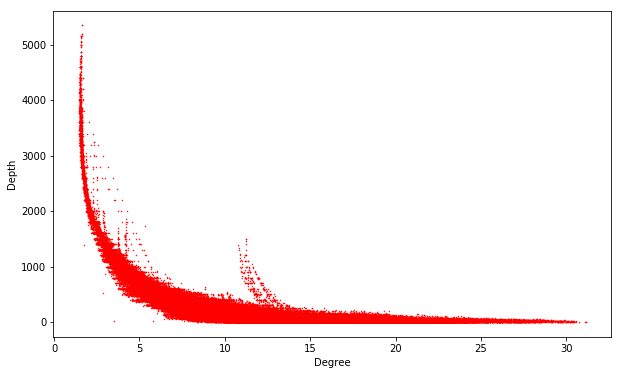

In [39]:
plt.figure(figsize = [10, 6]) # width, height
plt.plot(sample['T_degC'], sample['Depthm'], 'ro', markersize=0.5)
plt.xlabel("Degree")
plt.ylabel("Depth")

# Look like exponential

Text(0,0.5,'Depth')

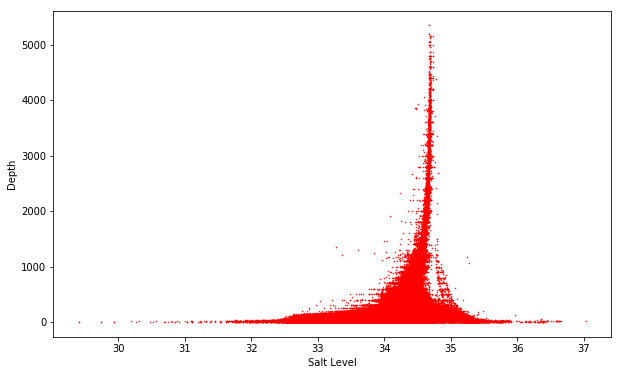

In [40]:
plt.figure(figsize = [10, 6]) # width, height
plt.plot(sample['Salnty'], sample['Depthm'], 'ro', markersize=0.5)
plt.xlabel("Salt Level")
plt.ylabel("Depth")

# Look like Gaussian

Text(0,0.5,'Depth')

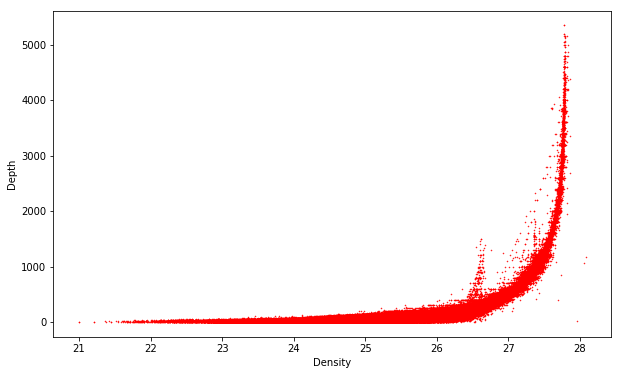

In [41]:
plt.figure(figsize = [10, 6]) # width, height
plt.plot(sample['STheta'], sample['Depthm'], 'ro', markersize=0.5)
plt.xlabel("Density")
plt.ylabel("Depth")

Text(0,0.5,'Depth')

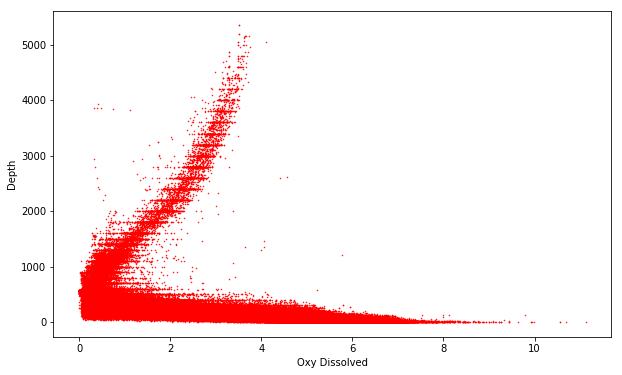

In [42]:
plt.figure(figsize = [10, 6]) # width, height
plt.plot(sample['O2ml_L'], sample['Depthm'], 'ro', markersize=0.5)
plt.xlabel("Oxy Dissolved")
plt.ylabel("Depth")

Text(0,0.5,'Degree')

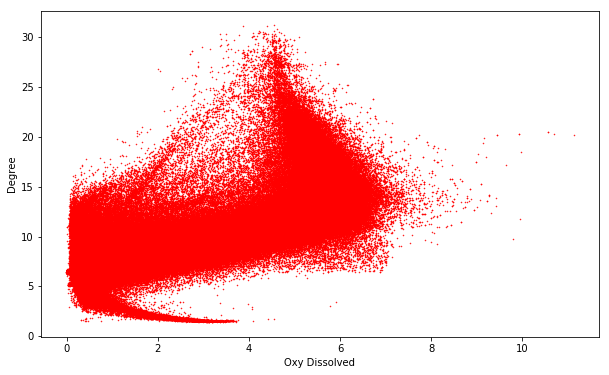

In [43]:
plt.figure(figsize = [10, 6]) # width, height
plt.plot(sample['O2ml_L'], sample['T_degC'],'ro', markersize=0.5)
plt.xlabel("Oxy Dissolved")
plt.ylabel("Degree")

In [44]:
sample.corr()['O2ml_L']

Cst_Cnt    0.147482
Btl_Cnt    0.145485
Depthm    -0.589101
T_degC     0.795007
Salnty    -0.824384
O2ml_L     1.000000
STheta    -0.889568
year       0.137376
month     -0.012353
Name: O2ml_L, dtype: float64

# Tach ra 2 mau train va test


In [45]:
sample.shape

(661268, 11)

In [46]:
train = sample.iloc[:660000]
test = sample.iloc[660000:]

In [47]:
# linear regression
# make matrix
X = train[ ['Depthm', 'T_degC', 'Salnty','STheta'] ].values
y = train['O2ml_L'].values
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) # gan duoi so 1 vao cuoi de dao ma tran

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b) # Dagger A * b
print('w = ', w)

w =  [ 8.46317510e+01  1.43906710e-03  6.44618212e-01 -3.94857928e+00
  1.74521931e+00]


In [48]:
X.shape

(660000, 4)

In [49]:
w[0]

84.6317510419176

In [50]:
def predict_O2(row):
    return w[0]+ row['Depthm'] * w[1] + row['T_degC'] * w[2] +\
            row['Salnty'] * w[3] + row['STheta'] * w[4]

In [51]:
test['Predict_O2'] = test.apply(predict_O2, axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
test.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,year,month,Predict_O2
863538,34356,863539,083.3 090.0,20-1611SR-MX-320-0351-08330900-0320A-3,320,7.107,34.1353,0.994,26.73144,1916,11,1.539841
863539,34356,863540,083.3 090.0,20-1611SR-MX-320-0351-08330900-0380A-3,380,6.295,34.1302,0.789,26.83653,1916,11,1.306298
863540,34356,863541,083.3 090.0,20-1611SR-MX-320-0351-08330900-0400A-7,400,6.207,34.1379,0.743,26.85429,1916,11,1.278944
863541,34356,863542,083.3 090.0,20-1611SR-MX-320-0351-08330900-0441A-3,441,5.837,34.1624,0.554,26.92072,1916,11,1.118632
863542,34356,863543,083.3 090.0,20-1611SR-MX-320-0351-08330900-0500A-7,500,5.568,34.2330,0.364,27.01041,1916,11,0.907893


See how well the linear regression fit with R2 + RSE

In [56]:
r2_score(test['O2ml_L'], test['Predict_O2'])

0.8504410746011779

In [58]:
mean_squared_error(test['O2ml_L'], test['Predict_O2'])

0.5472389948479367

In [92]:
# Polynomial Regression
X = train[ ['Depthm', 'T_degC', 'Salnty','STheta'] ].values
y = train['O2ml_L'].values
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
print(X.shape)

# now it not difference from Linear

# Calculating weights of the fitting line 
A = np.dot(X.T, X)
b = np.dot(X.T, y)
w = np.dot(np.linalg.pinv(A), b) # Dagger A * b
print('w = ', w)
print(w.shape)

(660000, 15)
w =  [ 1.71143654e-01  2.93980516e-02  3.73578467e-01  2.82417924e+00
  2.27656899e+00 -4.49909376e-07 -3.97588997e-04 -1.47194631e-03
  9.34704183e-04 -2.45450631e-01  1.33567391e-01 -2.52781844e-01
  5.02859090e-01 -3.40168408e-01 -5.69259117e-01]
(15,)


In [108]:
def predict_02_poly(row, weight = w):
    X = (row[ ['Depthm', 'T_degC', 'Salnty','STheta'] ].values).reshape((1,4))
    #print(X)
    poly = PolynomialFeatures(degree=2)
    X = poly.fit_transform(X)
    #print(X)
    # print(X.shape)
    # print(X.T.shape)
    # print(weight)
    return np.dot(X,weight)[0]

In [109]:
test['Predict_O2_poly'] = test.apply(predict_02_poly, axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let see how well polynomial perform

In [110]:
r2_score(test['O2ml_L'], test['Predict_O2_poly'])

0.958090722828067

In [111]:
mean_squared_error(test['O2ml_L'], test['Predict_O2_poly'])

0.1533468541126124

# As we can see poly perform much better in this case than linear